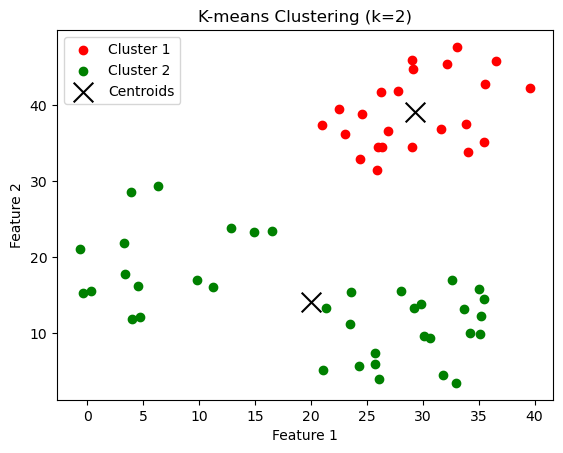

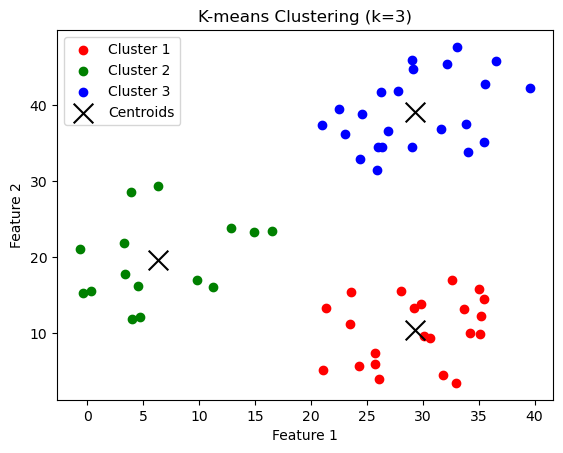

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_dataset(file_path):
    return pd.read_csv(file_path)

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def k_means(data, k, max_iters=100):
    centroids = data.sample(k).to_numpy()

    for _ in range(max_iters):
        distances = np.array([np.apply_along_axis(euclidean_distance, 1, data.to_numpy(), centroid) for centroid in centroids])
        labels = np.argmin(distances, axis=0)

        for i in range(k):
            centroids[i] = np.mean(data[labels == i].to_numpy(), axis=0)

    return labels, centroids

def plot_clusters(data, labels, centroids, k):
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    for i in range(k):
        cluster_points = data[labels == i]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=colors[i], label=f'Cluster {i + 1}')

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='k', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering (k={k})')
    plt.legend()
    plt.show()

def main():
    file_path = 'kmeans - kmeans_blobs.csv'
    dataset = load_dataset(file_path)

    k2_labels, k2_centroids = k_means(dataset, k=2)
    plot_clusters(dataset, k2_labels, k2_centroids, k=2)

    k3_labels, k3_centroids = k_means(dataset, k=3)
    plot_clusters(dataset, k3_labels, k3_centroids, k=3)

if __name__ == "__main__":
    main()
